# RNA-seq - Análise de Abundância de Transcritos
## De Kallisto a DESeq2

Alguns _sites_ com tutoriais de base:   
[DESeq2 funções, Michael Love _et_al ](https://bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html#deseq2-import-functions)  
[RNA-seq workflow](https://dockflow.org/workflow/rnaseq-gene/)  

In [44]:
library(tximport)
library(apeglm)
library(biomaRt)
library(DESeq2)
library(readr)
library(dplyr)
library(rhdf5)
library(IHW)

In [2]:
## Parte 1 - Preparação de dados das amostras de kallisto.
# Caminho dos arquivos (fele path)
dir <- './results'
list.files(dir)


# Nomes de populações
ZIKA <- 'ZIKA'
CHIKV <- 'CHIKV'
CHIKV_REC <- 'CHIKV_REC'
GBS <- 'GBS'
GBS_REC <- 'GBS_REC'
CONTROL <- 'CONTROL'

# Vetor com nomes populações para fazer coluna pop:
# Obs.: Ao fazer o vetor, melhor deixar organizado combinando amostra + nomearquivo
pop <- c(rep(GBS, 3), rep(CONTROL, 6), rep(ZIKA, 3), rep(GBS, 6), 
         rep(GBS_REC, 3), rep(CHIKV_REC, 3), rep(CONTROL, 3), rep(GBS, 3), 
         rep(CONTROL, 3),rep(CHIKV, 3), rep(ZIKA, 3), rep(GBS, 3), 
         rep(GBS_REC, 9), rep(CHIKV, 6), rep(CONTROL, 6), rep(CHIKV_REC, 3), 
         rep(ZIKA, 3), rep(GBS_REC, 6), rep(GBS, 3), rep(CHIKV, 3), 
         rep(CHIKV_REC, 12), rep(ZIKA, 3), rep(GBS_REC, 9))


[1] "1_rep1"  "1_rep2"  "1_rep3"  "10_rep1" "10_rep2" "10_rep3" "11_rep1"
  [8] "11_rep2" "11_rep3" "12_rep1" "12_rep2" "12_rep3" "13_rep1" "13_rep2"
 [15] "13_rep3" "14_rep1" "14_rep2" "14_rep3" "16_rep1" "16_rep2" "16_rep3"
 [22] "18_rep1" "18_rep2" "18_rep3" "19_rep1" "19_rep2" "19_rep3" "2_rep1" 
 [29] "2_rep2"  "2_rep3"  "20_rep1" "20_rep2" "20_rep3" "22_rep1" "22_rep2"
 [36] "22_rep3" "24_rep1" "24_rep2" "24_rep3" "25_rep1" "25_rep2" "25_rep3"
 [43] "27_rep1" "27_rep2" "27_rep3" "28_rep1" "28_rep2" "28_rep3" "30_rep1"
 [50] "30_rep2" "30_rep3" "31_rep1" "31_rep2" "31_rep3" "32_rep1" "32_rep2"
 [57] "32_rep3" "33_rep1" "33_rep2" "33_rep3" "34_rep1" "34_rep2" "34_rep3"
 [64] "35_rep1" "35_rep2" "35_rep3" "36_rep1" "36_rep2" "36_rep3" "38_rep1"
 [71] "38_rep2" "38_rep3" "39_rep1" "39_rep2" "39_rep3" "4_rep1"  "4_rep2" 
 [78] "4_rep3"  "40_rep1" "40_rep2" "40_rep3" "41_rep1" "41_rep2" "41_rep3"
 [85] "42_rep1" "42_rep2" "42_rep3" "46_rep1" "46_rep2" "46_rep3" "47_rep1"
 [92] "47_rep2" "47_rep3" "48_rep1" "48_rep2" "48_rep3" "7_rep1"  "7_rep2" 
 [99] "7_rep3"  "8_rep1"  "8_rep2"  "8_rep3"  "9_rep1"  "9_rep2"  "9_rep3"

Agora, observar se está tudo ok.

In [3]:
pop              # ZIKA, CHIKV, CHIKV_REC, GBS, GBS_REC, CONTROL
length(pop)      # 105

[1] "GBS"       "GBS"       "GBS"       "CONTROL"   "CONTROL"   "CONTROL"  
  [7] "CONTROL"   "CONTROL"   "CONTROL"   "ZIKA"      "ZIKA"      "ZIKA"     
 [13] "GBS"       "GBS"       "GBS"       "GBS"       "GBS"       "GBS"      
 [19] "GBS_REC"   "GBS_REC"   "GBS_REC"   "CHIKV_REC" "CHIKV_REC" "CHIKV_REC"
 [25] "CONTROL"   "CONTROL"   "CONTROL"   "GBS"       "GBS"       "GBS"      
 [31] "CONTROL"   "CONTROL"   "CONTROL"   "CHIKV"     "CHIKV"     "CHIKV"    
 [37] "ZIKA"      "ZIKA"      "ZIKA"      "GBS"       "GBS"       "GBS"      
 [43] "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS_REC"  
 [49] "GBS_REC"   "GBS_REC"   "GBS_REC"   "CHIKV"     "CHIKV"     "CHIKV"    
 [55] "CHIKV"     "CHIKV"     "CHIKV"     "CONTROL"   "CONTROL"   "CONTROL"  
 [61] "CONTROL"   "CONTROL"   "CONTROL"   "CHIKV_REC" "CHIKV_REC" "CHIKV_REC"
 [67] "ZIKA"      "ZIKA"      "ZIKA"      "GBS_REC"   "GBS_REC"   "GBS_REC"  
 [73] "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS"       "GBS"       "GBS"      
 [79] "CHIKV"     "CHIKV"     "CHIKV"     "CHIKV_REC" "CHIKV_REC" "CHIKV_REC"
 [85] "CHIKV_REC" "CHIKV_REC" "CHIKV_REC" "CHIKV_REC" "CHIKV_REC" "CHIKV_REC"
 [91] "CHIKV_REC" "CHIKV_REC" "CHIKV_REC" "ZIKA"      "ZIKA"      "ZIKA"     
 [97] "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS_REC"   "GBS_REC"  
[103] "GBS_REC"   "GBS_REC"   "GBS_REC"

[1] 105

In [4]:
# Nome de centro de pesquisa para fazer coluna center
center <- rep('IMT-UFRN', 105)
center
length(center)   # 105 == pop


# Nomes de amostras analisadas para fazer coluna run
run <- list.files(dir)
run
mode(run)
length(run)  # 105 == pop


condition <- c(rep('gbs', 3), rep('control', 6), rep('zika', 3), rep('gbs', 6), 
               rep('gbs_rec', 3), rep('chikv_rec', 3), rep('control', 3), rep('gbs', 3), 
               rep('control', 3),rep('chikv', 3), rep('zika', 3), rep('gbs', 3), 
               rep('gbs_rec', 9), rep(CHIKV, 6), rep('control', 6), rep('chikv_rec', 3), 
               rep('zika', 3), rep('gbs_rec', 6), rep('gbs', 3), rep(CHIKV, 3), 
               rep('chikv_rec', 12), rep('zika', 3), rep('gbs_rec', 9))



[1] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
  [7] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [13] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [19] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [25] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [31] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [37] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [43] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [49] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [55] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [61] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [67] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [73] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [79] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [85] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [91] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
 [97] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"
[103] "IMT-UFRN" "IMT-UFRN" "IMT-UFRN"

[1] 105

[1] "1_rep1"  "1_rep2"  "1_rep3"  "10_rep1" "10_rep2" "10_rep3" "11_rep1"
  [8] "11_rep2" "11_rep3" "12_rep1" "12_rep2" "12_rep3" "13_rep1" "13_rep2"
 [15] "13_rep3" "14_rep1" "14_rep2" "14_rep3" "16_rep1" "16_rep2" "16_rep3"
 [22] "18_rep1" "18_rep2" "18_rep3" "19_rep1" "19_rep2" "19_rep3" "2_rep1" 
 [29] "2_rep2"  "2_rep3"  "20_rep1" "20_rep2" "20_rep3" "22_rep1" "22_rep2"
 [36] "22_rep3" "24_rep1" "24_rep2" "24_rep3" "25_rep1" "25_rep2" "25_rep3"
 [43] "27_rep1" "27_rep2" "27_rep3" "28_rep1" "28_rep2" "28_rep3" "30_rep1"
 [50] "30_rep2" "30_rep3" "31_rep1" "31_rep2" "31_rep3" "32_rep1" "32_rep2"
 [57] "32_rep3" "33_rep1" "33_rep2" "33_rep3" "34_rep1" "34_rep2" "34_rep3"
 [64] "35_rep1" "35_rep2" "35_rep3" "36_rep1" "36_rep2" "36_rep3" "38_rep1"
 [71] "38_rep2" "38_rep3" "39_rep1" "39_rep2" "39_rep3" "4_rep1"  "4_rep2" 
 [78] "4_rep3"  "40_rep1" "40_rep2" "40_rep3" "41_rep1" "41_rep2" "41_rep3"
 [85] "42_rep1" "42_rep2" "42_rep3" "46_rep1" "46_rep2" "46_rep3" "47_rep1"
 [92] "47_rep2" "47_rep3" "48_rep1" "48_rep2" "48_rep3" "7_rep1"  "7_rep2" 
 [99] "7_rep3"  "8_rep1"  "8_rep2"  "8_rep3"  "9_rep1"  "9_rep2"  "9_rep3"

[1] "character"

[1] 105

## Parte II
### Aqui inicia-se a construção do data frame com todas as informações de amostras.   
Dependendo dos grupos a serem analisados por DESeq2, pode-se eliminar linhas do data frame contendo aquelas amostras que não serão usadas.  

Ver mais a frente.   

In [5]:
## Parte 2 - Unir cada vetor formando colunas de um data frame.
# Replicatas
replicates <- c('rep01', 'rep02', 'rep03 ')

samples_info <- data.frame(pop = pop, 
                      center = center, 
                      run = run,
                      condition = condition,
                      replicate = rep(replicates, 35))   

# Obs.: Replicate: Não colocar 105 pois são de 3 em 3.
# Logo: 35 x 3 = 105. Repete-se a tríade 35 vezes, o que geram 105 replicatas.

### Observar o data frame formado (**samples_info**).

In [6]:
# Observações gerais:
head(samples_info, 10)


pop,center,run,condition,replicate
<fct>,<fct>,<fct>,<fct>,<fct>
GBS,IMT-UFRN,1_rep1,gbs,rep01
GBS,IMT-UFRN,1_rep2,gbs,rep02
GBS,IMT-UFRN,1_rep3,gbs,rep03
CONTROL,IMT-UFRN,10_rep1,control,rep01
CONTROL,IMT-UFRN,10_rep2,control,rep02
CONTROL,IMT-UFRN,10_rep3,control,rep03
CONTROL,IMT-UFRN,11_rep1,control,rep01
CONTROL,IMT-UFRN,11_rep2,control,rep02
CONTROL,IMT-UFRN,11_rep3,control,rep03


In [7]:
str(samples_info)

'data.frame':	105 obs. of  5 variables:
 $ pop      : Factor w/ 6 levels "CHIKV","CHIKV_REC",..: 4 4 4 3 3 3 3 3 3 6 ...
 $ center   : Factor w/ 1 level "IMT-UFRN": 1 1 1 1 1 1 1 1 1 1 ...
 $ run      : Factor w/ 105 levels "1_rep1","1_rep2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ condition: Factor w/ 7 levels "chikv","CHIKV",..: 5 5 5 4 4 4 4 4 4 7 ...
 $ replicate: Factor w/ 3 levels "rep01","rep02",..: 1 2 3 1 2 3 1 2 3 1 ...


In [8]:
names(samples_info)

[1] "pop"       "center"    "run"       "condition" "replicate"

In [9]:
str(samples_info$pop)

 Factor w/ 6 levels "CHIKV","CHIKV_REC",..: 4 4 4 3 3 3 3 3 3 6 ...


In [10]:
str(samples_info$condition)

 Factor w/ 7 levels "chikv","CHIKV",..: 5 5 5 4 4 4 4 4 4 7 ...


In [11]:
str(samples_info$run)

 Factor w/ 105 levels "1_rep1","1_rep2",..: 1 2 3 4 5 6 7 8 9 10 ...


In [12]:
str(samples_info$replicate)

 Factor w/ 3 levels "rep01","rep02",..: 1 2 3 1 2 3 1 2 3 1 ...


## Eliminando Linhas do Data Frame por Nomes
Usando dplyr, função `filter` de **dplyr** e negando com **regex** (função `grepl`)

In [13]:
# Neste caso, deixar apenas as conditions ZIKV e CONTROL
samples_info <- samples_info %>% 
  filter(!grepl('GBS', pop))

samples_info <- samples_info %>% 
  filter(!grepl('GBS_REC', pop))

samples_info <- samples_info %>% 
  filter(!grepl('CHIKV', pop))

samples_info <- samples_info %>% 
  filter(!grepl('CHIKV_REC', pop))

samples_info

pop,center,run,condition,replicate
<fct>,<fct>,<fct>,<fct>,<fct>
CONTROL,IMT-UFRN,10_rep1,control,rep01
CONTROL,IMT-UFRN,10_rep2,control,rep02
CONTROL,IMT-UFRN,10_rep3,control,rep03
CONTROL,IMT-UFRN,11_rep1,control,rep01
CONTROL,IMT-UFRN,11_rep2,control,rep02
CONTROL,IMT-UFRN,11_rep3,control,rep03
ZIKA,IMT-UFRN,12_rep1,zika,rep01
ZIKA,IMT-UFRN,12_rep2,zika,rep02
ZIKA,IMT-UFRN,12_rep3,zika,rep03


In [14]:
# # Salvar a tabela no formato .txt (tsv)
write.table(samples_info, 'amostras_zikvCtl.txt', sep = '\t')

In [15]:
# Criar um vetor nomeado apontando os arquivos de quantificação.
# Estes arquivos têm seus nomes anotados em uma tabela (samples.txt).
samples <- read.table('amostras_zikvCtl.txt', header = TRUE, row.names = 1)
head(samples)
samples$condition 
mode(samples)

pop,center,run,condition,replicate
<fct>,<fct>,<fct>,<fct>,<fct>
CONTROL,IMT-UFRN,10_rep1,control,rep01
CONTROL,IMT-UFRN,10_rep2,control,rep02
CONTROL,IMT-UFRN,10_rep3,control,rep03
CONTROL,IMT-UFRN,11_rep1,control,rep01
CONTROL,IMT-UFRN,11_rep2,control,rep02
CONTROL,IMT-UFRN,11_rep3,control,rep03


[1] control control control control control control zika    zika    zika   
[10] control control control control control control zika    zika    zika   
[19] control control control control control control zika    zika    zika   
[28] zika    zika    zika   
Levels: control zika

[1] "list"

In [16]:
# Nomeando as linhas com nome de cada arquivo de amostra:
rownames(samples) <- samples$run

samples

,pop,center,run,condition,replicate
,<fct>,<fct>,<fct>,<fct>,<fct>
10_rep1,CONTROL,IMT-UFRN,10_rep1,control,rep01
10_rep2,CONTROL,IMT-UFRN,10_rep2,control,rep02
10_rep3,CONTROL,IMT-UFRN,10_rep3,control,rep03
11_rep1,CONTROL,IMT-UFRN,11_rep1,control,rep01
11_rep2,CONTROL,IMT-UFRN,11_rep2,control,rep02
11_rep3,CONTROL,IMT-UFRN,11_rep3,control,rep03
12_rep1,ZIKA,IMT-UFRN,12_rep1,zika,rep01
12_rep2,ZIKA,IMT-UFRN,12_rep2,zika,rep02
12_rep3,ZIKA,IMT-UFRN,12_rep3,zika,rep03


In [17]:
# Obtendo cada arquivo de replicata das amostras usadas em kallisto:
files <- file.path(dir, samples$run, 'abundance.h5')
files

[1] "./results/10_rep1/abundance.h5" "./results/10_rep2/abundance.h5"
 [3] "./results/10_rep3/abundance.h5" "./results/11_rep1/abundance.h5"
 [5] "./results/11_rep2/abundance.h5" "./results/11_rep3/abundance.h5"
 [7] "./results/12_rep1/abundance.h5" "./results/12_rep2/abundance.h5"
 [9] "./results/12_rep3/abundance.h5" "./results/19_rep1/abundance.h5"
[11] "./results/19_rep2/abundance.h5" "./results/19_rep3/abundance.h5"
[13] "./results/20_rep1/abundance.h5" "./results/20_rep2/abundance.h5"
[15] "./results/20_rep3/abundance.h5" "./results/24_rep1/abundance.h5"
[17] "./results/24_rep2/abundance.h5" "./results/24_rep3/abundance.h5"
[19] "./results/33_rep1/abundance.h5" "./results/33_rep2/abundance.h5"
[21] "./results/33_rep3/abundance.h5" "./results/34_rep1/abundance.h5"
[23] "./results/34_rep2/abundance.h5" "./results/34_rep3/abundance.h5"
[25] "./results/36_rep1/abundance.h5" "./results/36_rep2/abundance.h5"
[27] "./results/36_rep3/abundance.h5" "./results/48_rep1/abundance.h5"
[29] "./results/48_rep2/abundance.h5" "./results/48_rep3/abundance.h5"

### Renomeando o nome dos arquivos para facilitar visualização:

In [18]:
names(files) <- samples$run
files

10_rep1                          10_rep2 
"./results/10_rep1/abundance.h5" "./results/10_rep2/abundance.h5" 
                         10_rep3                          11_rep1 
"./results/10_rep3/abundance.h5" "./results/11_rep1/abundance.h5" 
                         11_rep2                          11_rep3 
"./results/11_rep2/abundance.h5" "./results/11_rep3/abundance.h5" 
                         12_rep1                          12_rep2 
"./results/12_rep1/abundance.h5" "./results/12_rep2/abundance.h5" 
                         12_rep3                          19_rep1 
"./results/12_rep3/abundance.h5" "./results/19_rep1/abundance.h5" 
                         19_rep2                          19_rep3 
"./results/19_rep2/abundance.h5" "./results/19_rep3/abundance.h5" 
                         20_rep1                          20_rep2 
"./results/20_rep1/abundance.h5" "./results/20_rep2/abundance.h5" 
                         20_rep3                          24_rep1 
"./results/20_rep3/abundance.h5" "./results/24_rep1/abundance.h5" 
                         24_rep2                          24_rep3 
"./results/24_rep2/abundance.h5" "./results/24_rep3/abundance.h5" 
                         33_rep1                          33_rep2 
"./results/33_rep1/abundance.h5" "./results/33_rep2/abundance.h5" 
                         33_rep3                          34_rep1 
"./results/33_rep3/abundance.h5" "./results/34_rep1/abundance.h5" 
                         34_rep2                          34_rep3 
"./results/34_rep2/abundance.h5" "./results/34_rep3/abundance.h5" 
                         36_rep1                          36_rep2 
"./results/36_rep1/abundance.h5" "./results/36_rep2/abundance.h5" 
                         36_rep3                          48_rep1 
"./results/36_rep3/abundance.h5" "./results/48_rep1/abundance.h5" 
                         48_rep2                          48_rep3 
"./results/48_rep2/abundance.h5" "./results/48_rep3/abundance.h5"

## Usando biomaRt para nomear transcritos e genes

In [19]:
# Usando biomaRt
mart <- biomaRt::useMart(biomart = "ensembl", 
                         dataset = "hsapiens_gene_ensembl", 
                         host="www.ensembl.org")


t2g <- biomaRt::getBM(attributes = c("ensembl_transcript_id", 
                                     "ensembl_gene_id"), 
                      mart = mart)


t2g <- dplyr::rename(t2g, target_id = ensembl_transcript_id,
                     ens_gene = ensembl_gene_id)


head(t2g, 20)
## Obs.: A coluna de transcripts IDs não possui versão.
## Ao utilizar o tximport prestar atenção na opção ignoreTxVersion.

Cache found


target_id,ens_gene
<chr>,<chr>
ENST00000387314,ENSG00000210049
ENST00000389680,ENSG00000211459
ENST00000387342,ENSG00000210077
ENST00000387347,ENSG00000210082
ENST00000386347,ENSG00000209082
ENST00000361390,ENSG00000198888
ENST00000387365,ENSG00000210100
ENST00000387372,ENSG00000210107
ENST00000387377,ENSG00000210112


## Parte III - Tximport utilizando arquivos Kallisto

In [20]:
# Estimativa de contagens a partir de kallisto,
# Usar ignoreTxVersion e ignoreAfterBar para que o data frame de IDs de transcritos
# e genes do Ensembl tenham ignorados as versões e barras |, respectivamente.
txi.kallisto <- tximport(files, 
                         type = 'kallisto',
                         tx2gene = t2g,
                         ignoreTxVersion = TRUE,
                         ignoreAfterBar = TRUE)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
transcripts missing from tx2gene: 1182
summarizing abundance
summarizing counts
summarizing length
summarizing inferential replicates


In [21]:
names(txi.kallisto)

[1] "abundance"           "counts"              "infReps"            
[4] "length"              "countsFromAbundance"

In [22]:
head(txi.kallisto$abundance)

,10_rep1,10_rep2,10_rep3,11_rep1,11_rep2,11_rep3,12_rep1,12_rep2,12_rep3,19_rep1,⋯,33_rep3,34_rep1,34_rep2,34_rep3,36_rep1,36_rep2,36_rep3,48_rep1,48_rep2,48_rep3
ENSG00000000003,0.6651769,0.4002442,0.000000,0.3047081,0.6457758,0.000000,0.2530875,0.000000,0.08363204,0.4143788,⋯,0.4229851,0.2749607,0.000000,9.450586e-05,0.5764135,0.5188167,0.3472068,0.000000,0.3277769,0.276775
ENSG00000000005,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.00000000,0.0000000,⋯,0.0000000,0.0000000,0.000000,0.000000e+00,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000
ENSG00000000419,9.8588238,12.1288879,10.448575,11.5798987,11.5541938,13.361654,12.9472755,11.894434,11.49664015,14.6009159,⋯,10.2439016,11.4545744,11.460918,1.341941e+01,18.7013990,21.5705816,21.5005432,18.678303,15.6666780,15.482687
ENSG00000000457,3.8903592,2.9325136,3.665589,3.8368947,4.0239041,5.535735,3.5809621,4.796242,2.94106809,7.0348926,⋯,5.2180454,4.9256569,4.280948,4.448773e+00,5.5080467,9.2593797,5.4859215,7.412572,6.2037117,5.731873
ENSG00000000460,2.3843329,4.0444167,2.069267,2.5162824,2.2116598,2.038352,1.6715376,1.825211,2.72374803,2.4340446,⋯,3.9979374,2.5518408,1.790044,4.275673e+00,1.9729809,0.9612744,2.6869175,1.814967,3.6928069,3.883366
ENSG00000000938,73.5906252,91.2613829,87.074937,105.6855771,115.9937598,104.723444,131.4772415,120.248601,125.06315221,141.4721446,⋯,110.5614554,107.5929020,96.086339,9.543128e+01,259.3361600,241.3592940,246.2594370,191.974455,180.4374481,198.567388


## Parte IV - DESeq2 

In [23]:
#### DESeq2
## Design com formula simples: sem avisos R; menor chance de erro.
dds.txi <- DESeqDataSetFromTximport(txi = txi.kallisto,
                                    colData = samples,
                                    design= ~ condition)

# Agora, o objeto dds.Txi pode ser usado como aquele dds nos
# passos subsequentes de DESeq2.


## Design com formula ~replicate + condition
# dds.txi <- DESeqDataSetFromTximport(txi = txi.kallisto,
#                                     colData = samples,
#                                     design= ~ replicate + condition)


## Observação de informarção após esse comando acima:
# https://support.bioconductor.org/p/62245/

# Michael Love responde:
# "Because you have other variables in the design other than Condition (Sex and ERCCMix), 
# you do not have 3 replicates of a unique combination of the design variables. 
# The count outlier behavior is explained in the vignette section "Approach to count outliers":

# "The results function automatically flags genes which contain a Cook’s distance above a cutoff 
# for samples which have 3 or more replicates."

# "With less than 3 replicates per unique combination, there is no filtering of potential count outliers."

# Agora, o objeto dds.Txi pode ser usado como aquele dds nos
# passos subsequentes de DESeq2.

using counts and average transcript lengths from tximport


In [24]:
head(dds.txi$replicate)

[1] rep01  rep02  rep03  rep01  rep02  rep03 
Levels: rep01 rep02 rep03

## Pre-filtering  

Não é necessário pré-filtragem de baixas contagens de genes antes de executar o DESeq2.  
Mas, segundo os autores, há dois motivos que tornam esse passo útil:   
a. Remoção de linhas no data frame `dds.txi` nas quais há poucas _reads_, pode-se reduzir o tamanho  
da memória do objeto de dados `dds` formado; 

b. Assim, eleva-se sa a velocidade de transformação e funções em DESeq2. 

Para maiores informações consultar [DESeq2 Bioconductor](http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html).  

In [25]:
# Filtrar por counts insignificantes.
keep <- rowSums(counts(dds.txi)) >= 10

In [26]:
dds <- dds.txi[keep,]

In [27]:
head(dds$replicate)

[1] rep01  rep02  rep03  rep01  rep02  rep03 
Levels: rep01 rep02 rep03

## Níveis dos fatores usados para análise
### Factor: variável categórica (ex.: condições zika, control)  

Por padrão, R escolherá um **fator de referência** ou seja **_reference level_** para fatores baseando-se em ordem alfabética.   
Neste caso, nosso fator de referência seria `control` de qualquer forma.  

Um teste será feito, adicionando-se um nível ao objeto `dds` para DESeq2, o antigo `dds.txi`.  

Segundo o manual DESeq2 há duas formas de fazer isso:   
a. Dizer explicitamente aos resultados em R que comparação fazer usando o argumento `contrast`;      
b. Ajustar explicitamente os _factors levels_.  

Para observar a mudança no nível de referência utilizado, pós fazer o renivelamento é preciso   
executar `DESeq` ou `nbinomWaldTest/nbinomLRT`.  Abaixo:   


```R language
dds$condition <- factor(dds$condition, levels = c("untreated","treated"))

# ou,  using relevel, just specifying the reference level:
dds$condition <- relevel(dds$condition, ref = "untreated")
``` 



In [28]:
head(dds$condition, 9)

[1] control control control control control control zika    zika    zika   
Levels: control zika

In [29]:
# Relevel como exemplo:
dds$condition <- relevel(dds$condition,
                        ref = "control")

## Análise de Expressão Diferencial   

Em DESeq2 as etapsas da análise de expressão diferencial são agrupadas em uma única função, `DESeq`.  

As **tabelas de resultados** são geradas através da função  `results` a qual extrai uma tabela de resultados com log2 fold changes, _p values_ e _adjusted p values_.  
Sem argumentos adicionais em `results` o _p value_ do **_Wald test_** e _log2 fold change_ será para a última variável do _design formula_ utilizado em DESeq2.  
Se este for um _factor_, a comparação será o último nível desta variável sobre o _reference level_.   

Entretanto, a ordem das variáveis do _design_ não importa tanto desde que o usuário especifique uma comparação para construir uma tabela de resultados,  
usando os argumentos `name` ou `contrast` de _results_.   

In [30]:
dds <- DESeq(dds)

estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 58 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [31]:
res <- results(dds)

In [32]:
res

log2 fold change (MLE): condition zika vs control 
Wald test p-value: condition zika vs control 
DataFrame with 21512 rows and 6 columns
                        baseMean      log2FoldChange              lfcSE
                       <numeric>           <numeric>          <numeric>
ENSG00000000003 2.99558340229563   -0.34871441994976  0.553626775497822
ENSG00000000419 53.2814389557738  0.0482887170197021 0.0896593213256229
ENSG00000000457 69.3447039581553 -0.0941540989336621  0.113335978297243
ENSG00000000460 25.7199962905926  -0.499910435859336  0.206384586997614
ENSG00000000938 1042.56427568169   0.389387719082639 0.0742192860615313
...                          ...                 ...                ...
ENSG00000287725 3.67200938208246  -0.471298631391275  0.458369380337311
ENSG00000288235 4.39865827625911  -0.227826509342784  0.323947379953503
ENSG00000288253 3.81976453750895   0.466572336805278  0.575181007709515
ENSG00000288258 2.09157476267846   0.570504774173694  0.647683089742771

Note que podemos especificar o coeficiente ou contraste que queremos construir como uma tabela de resultados, usando: 

In [33]:
res <- results(dds, contrast = c('condition', 'zika', 'control'))

In [34]:
res

log2 fold change (MLE): condition zika vs control 
Wald test p-value: condition zika vs control 
DataFrame with 21512 rows and 6 columns
                        baseMean      log2FoldChange              lfcSE
                       <numeric>           <numeric>          <numeric>
ENSG00000000003 2.99558340229563   -0.34871441994976  0.553626775497822
ENSG00000000419 53.2814389557738  0.0482887170197021 0.0896593213256229
ENSG00000000457 69.3447039581553 -0.0941540989336621  0.113335978297243
ENSG00000000460 25.7199962905926  -0.499910435859336  0.206384586997614
ENSG00000000938 1042.56427568169   0.389387719082639 0.0742192860615313
...                          ...                 ...                ...
ENSG00000287725 3.67200938208246  -0.471298631391275  0.458369380337311
ENSG00000288235 4.39865827625911  -0.227826509342784  0.323947379953503
ENSG00000288253 3.81976453750895   0.466572336805278  0.575181007709515
ENSG00000288258 2.09157476267846   0.570504774173694  0.647683089742771

## Log fold change shrinkage for visualization and ranking

Contração log fod change para visualização e ranqueamento.   

**_Shrinkage of effect size (LFC estimates)_**.   
Contração/encolhimento do efeito de tamanho (**_LFC estimates_**) é útil para visualização e ranqueamento de genes. 

Para contrair (**_to shrink_**) o LFC passamos o objeto `dds` para a função `lfcShrink`.   

In [35]:
resultsNames(dds)

[1] "Intercept"                 "condition_zika_vs_control"

In [36]:
resLFC <- lfcShrink(dds, coef = 'condition_zika_vs_control', type = 'apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [37]:
resLFC

log2 fold change (MAP): condition zika vs control 
Wald test p-value: condition zika vs control 
DataFrame with 21512 rows and 5 columns
                        baseMean      log2FoldChange              lfcSE
                       <numeric>           <numeric>          <numeric>
ENSG00000000003 2.99558340229563 -0.0220497884149622  0.142235265367695
ENSG00000000419 53.2814389557738  0.0351768215289019 0.0771091845344226
ENSG00000000457 69.3447039581553 -0.0599945468971376 0.0934272085070527
ENSG00000000460 25.7199962905926  -0.302380508833491  0.240908881142826
ENSG00000000938 1042.56427568169   0.366530851321527 0.0753677415955466
...                          ...                 ...                ...
ENSG00000287725 3.67200938208246  -0.044215955497326  0.146870327154119
ENSG00000288235 4.39865827625911 -0.0390549987631505   0.13797788877644
ENSG00000288253 3.81976453750895  0.0247594786043326  0.143574444341633
ENSG00000288258 2.09157476267846  0.0280738913798387   0.14472170711102

## Reordenando Resultados com p-values e adjusted p-vaules   

Ordenar os resultados da tabela por menor p value:  

In [38]:
resOrdered <- res[order(res$pvalue), ]

In [39]:
summary(res)


out of 21507 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 781, 3.6%
LFC < 0 (down)     : 1136, 5.3%
outliers [1]       : 0, 0%
low counts [2]     : 4175, 19%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [40]:
# Quantos adjusted p-values são menores que 0.1?
sum(res$padj < 0.1, na.rm = TRUE)

[1] 1917

In [41]:
# FDR cutoff, alpha.
res05 <- results(dds, alpha=0.05)
summary(res05)


out of 21507 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 556, 2.6%
LFC < 0 (down)     : 851, 4%
outliers [1]       : 0, 0%
low counts [2]     : 6260, 29%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [42]:
sum(res05$padj < 0.05, na.rm=TRUE)

[1] 1407

## Ponderação Independente de Hipóteses  
### Independent Hypothesis Weighting  

Filtragem de _p value_: ponderar (_weight_) hipóteses para otimizar o poder.  
Está disponível no bioconductor, sob nome [IHW](http://bioconductor.org/packages/release/bioc/html/IHW.html).  

In [45]:
resIHW <- results(dds, filterFun = ihw)

In [47]:
summary(resIHW)


out of 21507 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 840, 3.9%
LFC < 0 (down)     : 1119, 5.2%
outliers [1]       : 0, 0%
[1] see 'cooksCutoff' argument of ?results
see metadata(res)$ihwResult on hypothesis weighting



In [48]:
sum(resIHW$padj < 0.1, na.rm=TRUE)

[1] 1959

In [49]:
metadata(resIHW)$ihwResult

ihwResult object with 21512 hypothesis tests 
Nominal FDR control level: 0.1 
Split into 14 bins, based on an ordinal covariate

## Parte V - Exploração de Resultados  

### MA-plot  

A função `plotMA` mostra os _log2 fold change_ atribuível a uma dada variável sobre a média de contagens   
normalizadas para todas as amostras no `DESeqDataSet`.   

Pontos serão coloridos em vermelho se o valor p ajustado (_adjusted p value_) for menor que 0.1.   
Pontos que caem fora da janela são plotados como triangulos abertos com ponstas para cima ou para baixo.   

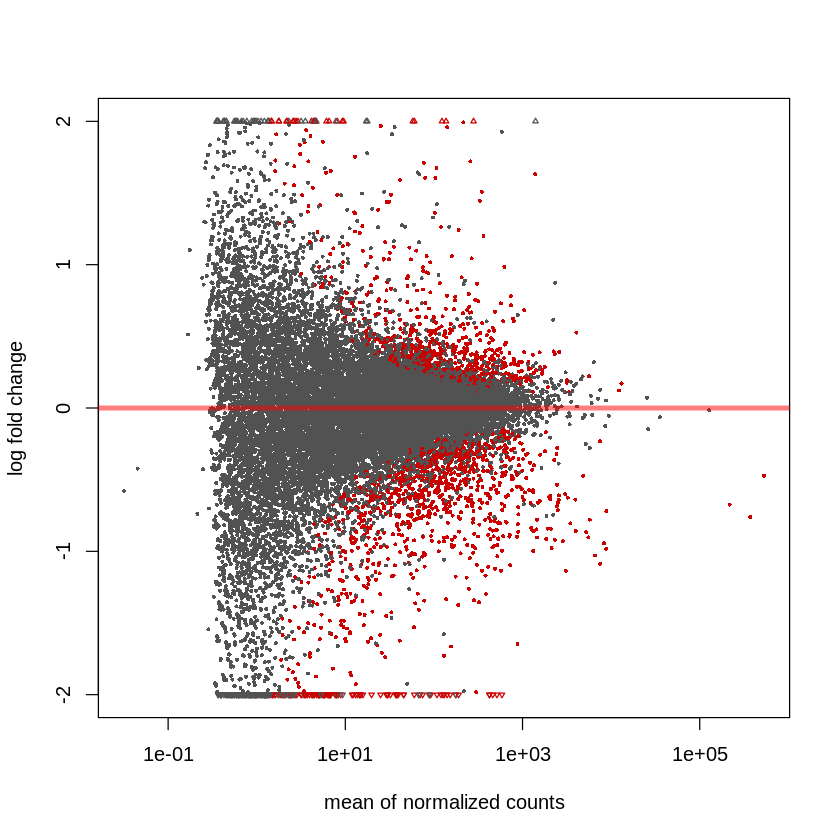

In [62]:
plotMA(res , ylim = c(-2, 2))

Segundo os autores é mais útil visualizar o MA-plot para aqueles  
_log2 fold changes_ que foram contraídos (**LFC**), removendo assim _noise_  
associado com mudanças _log2 fold changes_ advindas de baixas contagens de genes   
sem requerimento de _thresholds_ de filtragem arbitrários.  

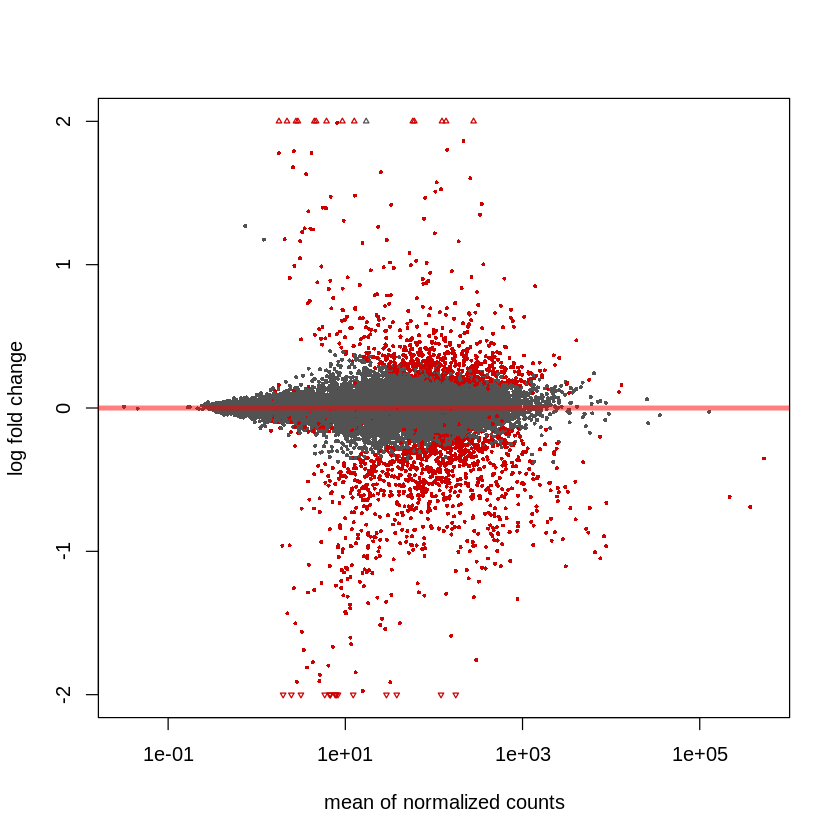

In [59]:
plotMA(resLFC, ylim=c(-2,2))

Após utilizar `plotMA` pode-se utilizar a função `identify` para detectar interativamente   
o número  de linhas de genes individuais ao clicar no plot.   

Pode-se então resgatar os IDs dos genes salvando os índices resultantes.   

In [67]:
idx <- identify(res$baseMean, res$log2FoldChange)

ERROR: Error in identify.default(res$baseMean, res$log2FoldChange): plot.new has not been called yet


## Estimadores de Encolhimento Alternativos (Alternative Shrinkage Estimators)  

In [68]:
# because we are interested in treated vs untreated, we set 'coef=2'
resNorm <- lfcShrink(dds, coef=2, type="normal")

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895


### Lembrar de objeto LFC e Shrinkage 
```R language
resLFC <- lfcShrink(dds, coef = 'condition_zika_vs_control', type = 'apeglm')
```

As outras serão:   

```r language
# because we are interested in treated vs untreated, we set 'coef=2'
resNorm <- lfcShrink(dds, coef=2, type="normal")
resAsh <- lfcShrink(dds, coef=2, type="ashr")

```

Love, Huber and Anders (2014) propuseram _log fold changes_ moderados o qual usa uma distribuição normal prévia,   
centrada sobre zero e com uma escala que se ajusta aos dados.  
Os _log fold changes_ contraídos (shrinkage) são úteis para o ranqueamento e visualização, sem a necessidade de  
filtros arbitrários em baixas contagens de genes.  

A função `lfcShrink` possui capacidade de receber parâmetros, disponíveis via argumento `type`.  

**Parâmetros utilizados na função `lfcShrink` via argumento `type`:   

 - `normal` - o estimador de _shrinkage_ original de DESeq2. Distribuição normal.  
 - `apeglm`- o estimador advindo do pacote **apeglm** (Zhu, Ibrahim, and Love 2018).  
 - `ashr`- o estimador _shrinkage_ adaptativo advindo do pacote **ashr** (Stephens 2016).   

In [69]:
# Especificar o coeficiente pela ordem em que aparece em results(dds)
# O coeficiente usado em lfcShrink anterior (resNorm) foi "condition zika vs control"
# Porém, é possível especificar o coeficiente pela ordem em que aparece quando se usa resultsnames(dds):
resultsNames(dds)

[1] "Intercept"                 "condition_zika_vs_control"

In [70]:
# Usaremos o coeficiente como 2, pois é o que indica condition_zika_Vs_control.
# Nosso intersse se dá no contraste entre ambos:
# because we are interested in treated vs untreated, we set 'coef=2'
resNorm <- lfcShrink(dds, coef=2, type="normal")
resAsh <- lfcShrink(dds, coef=2, type="ashr")

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895
using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041


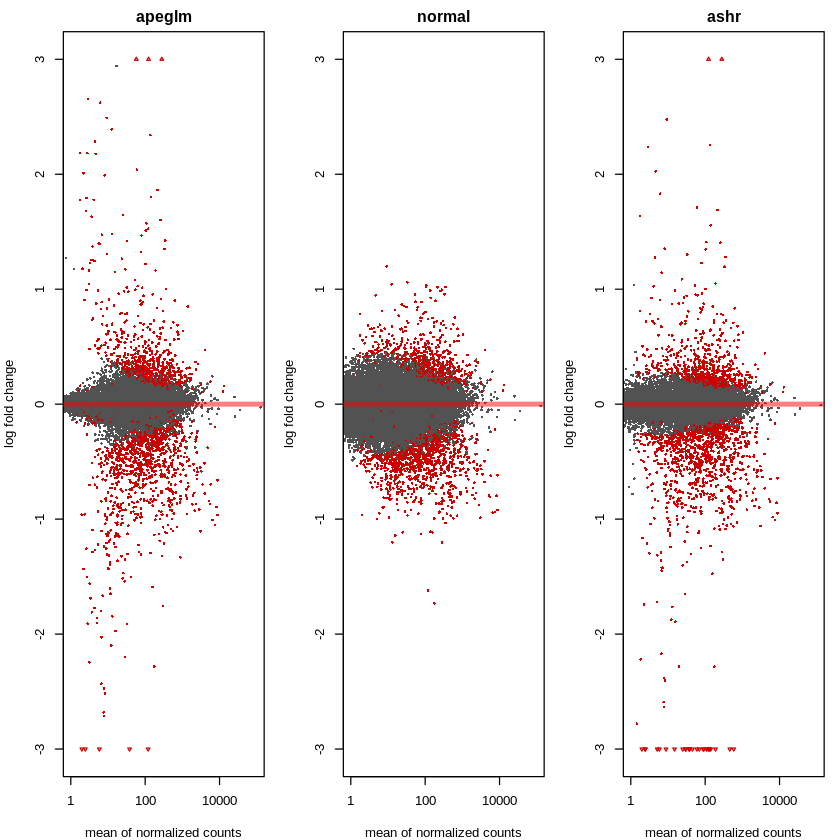

In [71]:
# Agora, observar os plots juntos
par(mfrow=c(1,3), mar=c(4,4,2,1))
xlim <- c(1,1e5); ylim <- c(-3,3)
plotMA(resLFC, xlim=xlim, ylim=ylim, main="apeglm")
plotMA(resNorm, xlim=xlim, ylim=ylim, main="normal")
plotMA(resAsh, xlim=xlim, ylim=ylim, main="ashr")

## Plot counts  

É útil examinar a contagem de _reads_ para um único gene entre os grupos (control e zika).   
Existe a função `plotCounts` que pode fazer isso, a qual normaliza as contagens por profundidade  
de sequenciamento (_sequencing depth_) e adiciona uma pseudocontagem de 1/2 para permitir a plotagem   
em escala de _log_.   

As contagens são agrupadas pelas variáveis no _intgroup_, onde mais que uma variável pode ser   
especificada. Aqui, especificamos o gene que teve o **menor valor p** da tabela de resultados   
criada acima. 

Pode-se selecionar o gene de interesse a ser plotado por _rowname_ ou por índice numérico.  

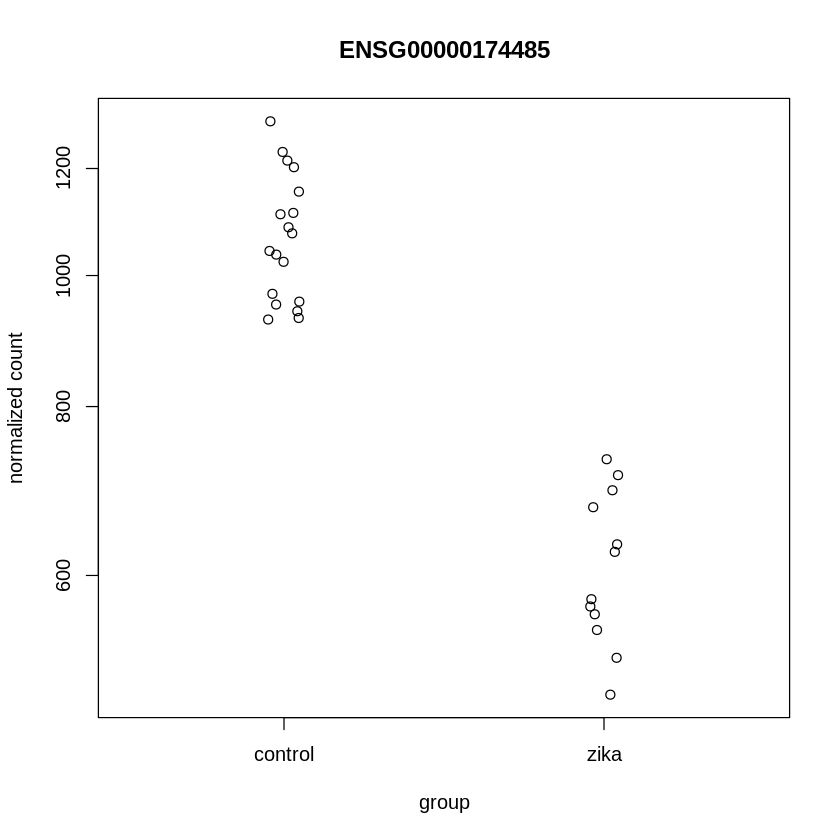

In [72]:
plotCounts(dds, gene=which.min(res$padj), intgroup="condition")

Para uma customização na plotagem, um argumento é `returnData` que pode aceitar um parâmtro lógico, especificando  
que a função de ve retornar apenas um _data.frame_ para plotagem com **ggplot**.  


Attaching package: ‘ggplot2’

The following object is masked from ‘package:IHW’:

    alpha



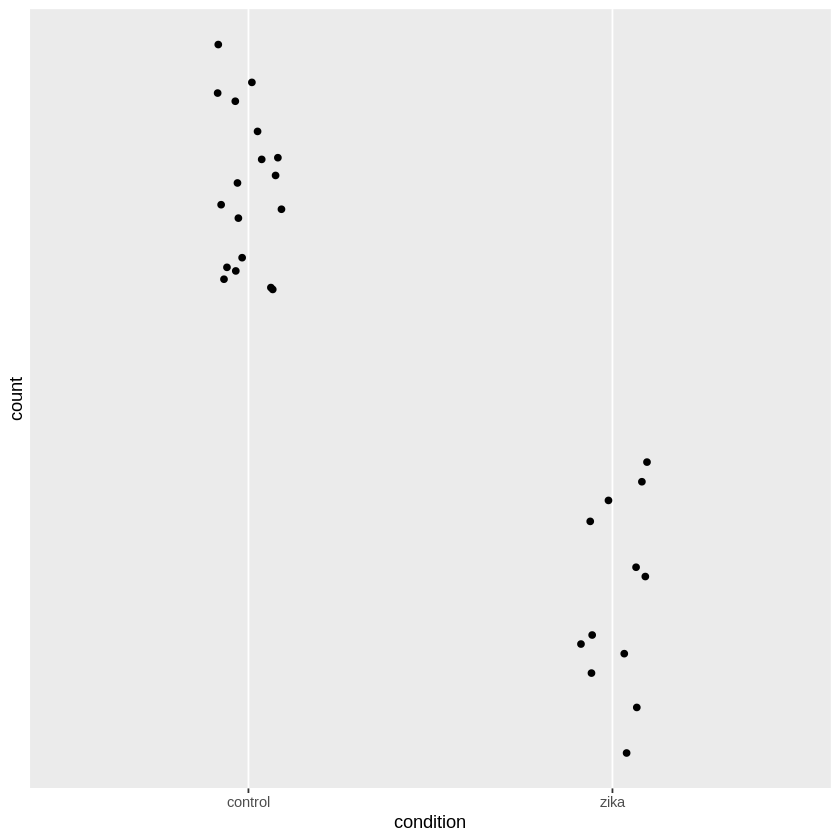

In [73]:
d <- plotCounts(dds, gene=which.min(res$padj), intgroup="condition", 
                returnData=TRUE)
library("ggplot2")
ggplot(d, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

## Exportando os Resultados em Arquivo CSV  

Arquivo de texto simples.

In [75]:
write.csv(as.data.frame(resOrdered), 
          file="zika_vs_controls_results.csv")

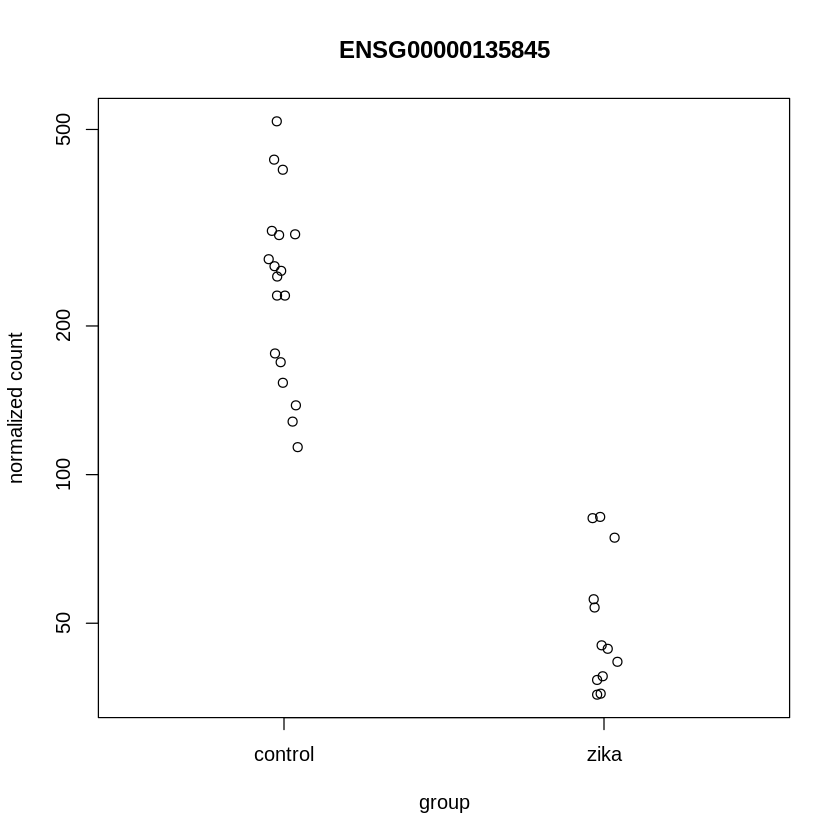

In [86]:
# Outros genes
plotCounts(dds, gene='ENSG00000135845', intgroup="condition")

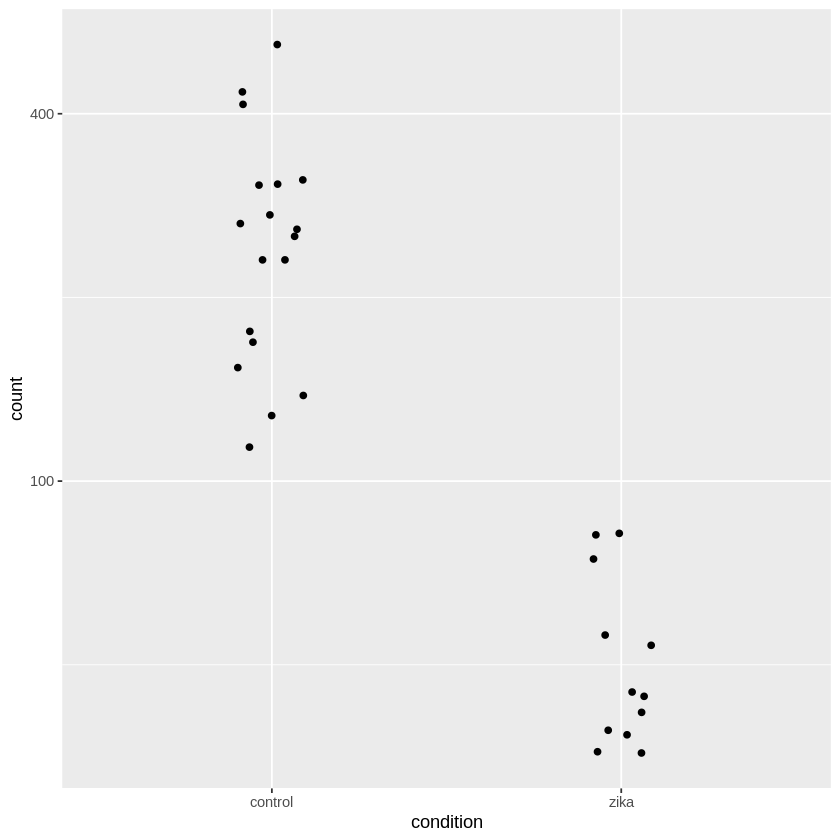

In [89]:
# Outros genes
e <- plotCounts(dds, gene='ENSG00000135845', intgroup="condition", returnData = T)
library("ggplot2")
ggplot(e, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

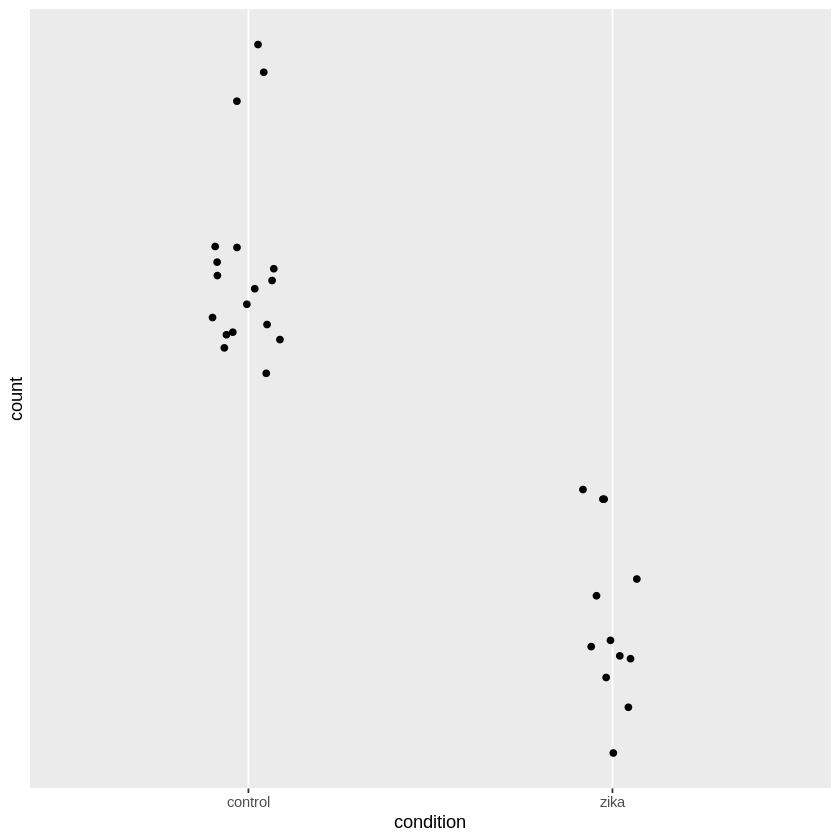

In [90]:
f <- plotCounts(dds, gene='ENSG00000168300', intgroup="condition", returnData = T)
library("ggplot2")
ggplot(f, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

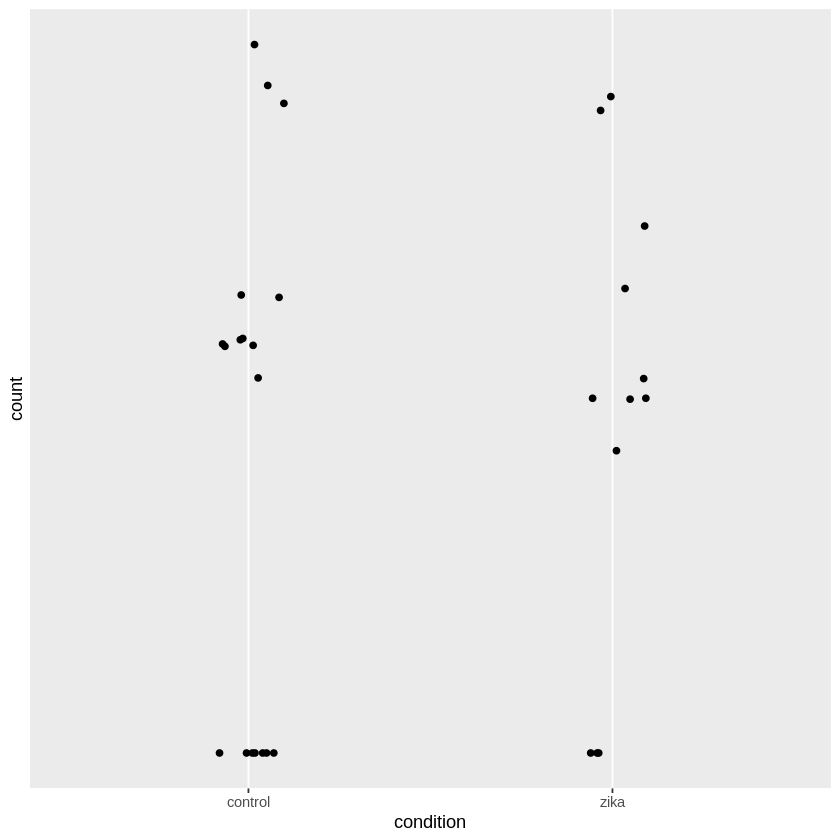

In [94]:
g <- plotCounts(dds, gene='ENSG00000254708', intgroup="condition", returnData = T)
library("ggplot2")
ggplot(g, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

## Mais Informações na Coluna Results

In [95]:
mcols(res)$description

[1] "mean of normalized counts for all samples"        
[2] "log2 fold change (MLE): condition zika vs control"
[3] "standard error: condition zika vs control"        
[4] "Wald statistic: condition zika vs control"        
[5] "Wald test p-value: condition zika vs control"     
[6] "BH adjusted p-values"